<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Modelos no lineales para pronósticos. 

**Nombres:** Axel Cabrera Jaramillo

**Fecha:** 4 febrero 2024

**Expediente** : 730793
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/jaramillooo/Tarea2_AECabrera

# Tarea 4: Clase 4

# Tarea 2.
Para ejemplo estudiado en esta clase data WWWUsage.csv probar lo siguiente:

Encontrar el mejor modelo ARIMA usando los criterios de AIC, BIC y log-verosimilud, justificando la estructura propuesta.
Analizar el efecto de normalizar la serie de tiempo, es decir usar MinMaxScaler para normalizar los datos. Posterior a esto, realizar el mismo precedimiento realizado en clase y encontrar el mejor modelo de ARIMA. Justifique todos los análisis realizados, incluyendo los resultados de las gráficas de ACF y PAC.

Investigar la implementación y teoría de los modelos SARIMAX. Además de eso, generar un modelo de pronóstico usando SARIMAX, donde todo el procediemiento anteriormente descrito es implementado, para el siguiente conjunto de datos con estacionalidad:
air2 = requests.get('https://www.stata-press.com/data/r12/air2.dta').content
data2 = pd.read_stata(BytesIO(air2))
data2.index = pd.date_range(start=datetime(data2.time[0], 1, 1), periods=len(data2), freq='MS')
Nota: Pueden basarse en el siguiente enlace para entender el análisis a realizar https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling/

Realizar una predicción de 20 unidades de tiempo en el futuro, tanto para el modelo ARIMA como SARIMA y reportar los resulados en una gráfica donde se puedan observar los datos reales y los datos predichos, cómo en la siguiente gráfica:
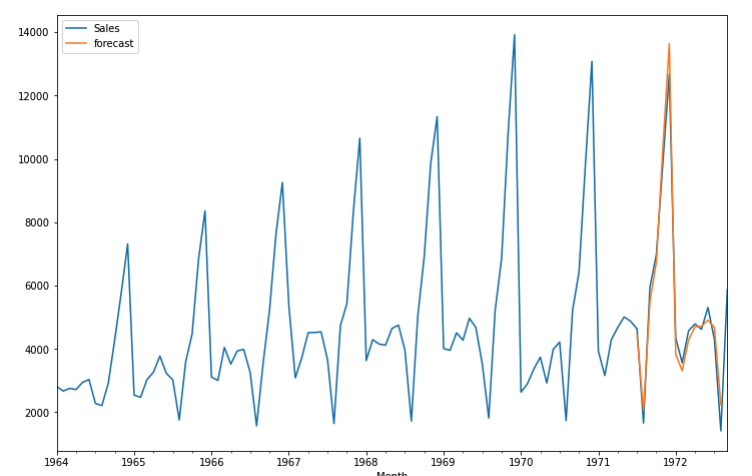

Notas adicionales
Conjunto de entrenamiento: Conjunto de ejemplos utilizados para el aprendizaje, es decir, para ajustarse a los parámetros del clasificador.

Conjunto de validación: un conjunto de ejemplos utilizados para ajustar los parámetros de un clasificador, por ejemplo, para elegir el número de unidades ocultas en una red neuronal.

Conjunto de prueba: un conjunto de ejemplos utilizados solo para evaluar el rendimiento de un clasificador completamente especificado.
https://machinelearningmastery.com/difference-test-validation-datasets/

#### Ejemplos

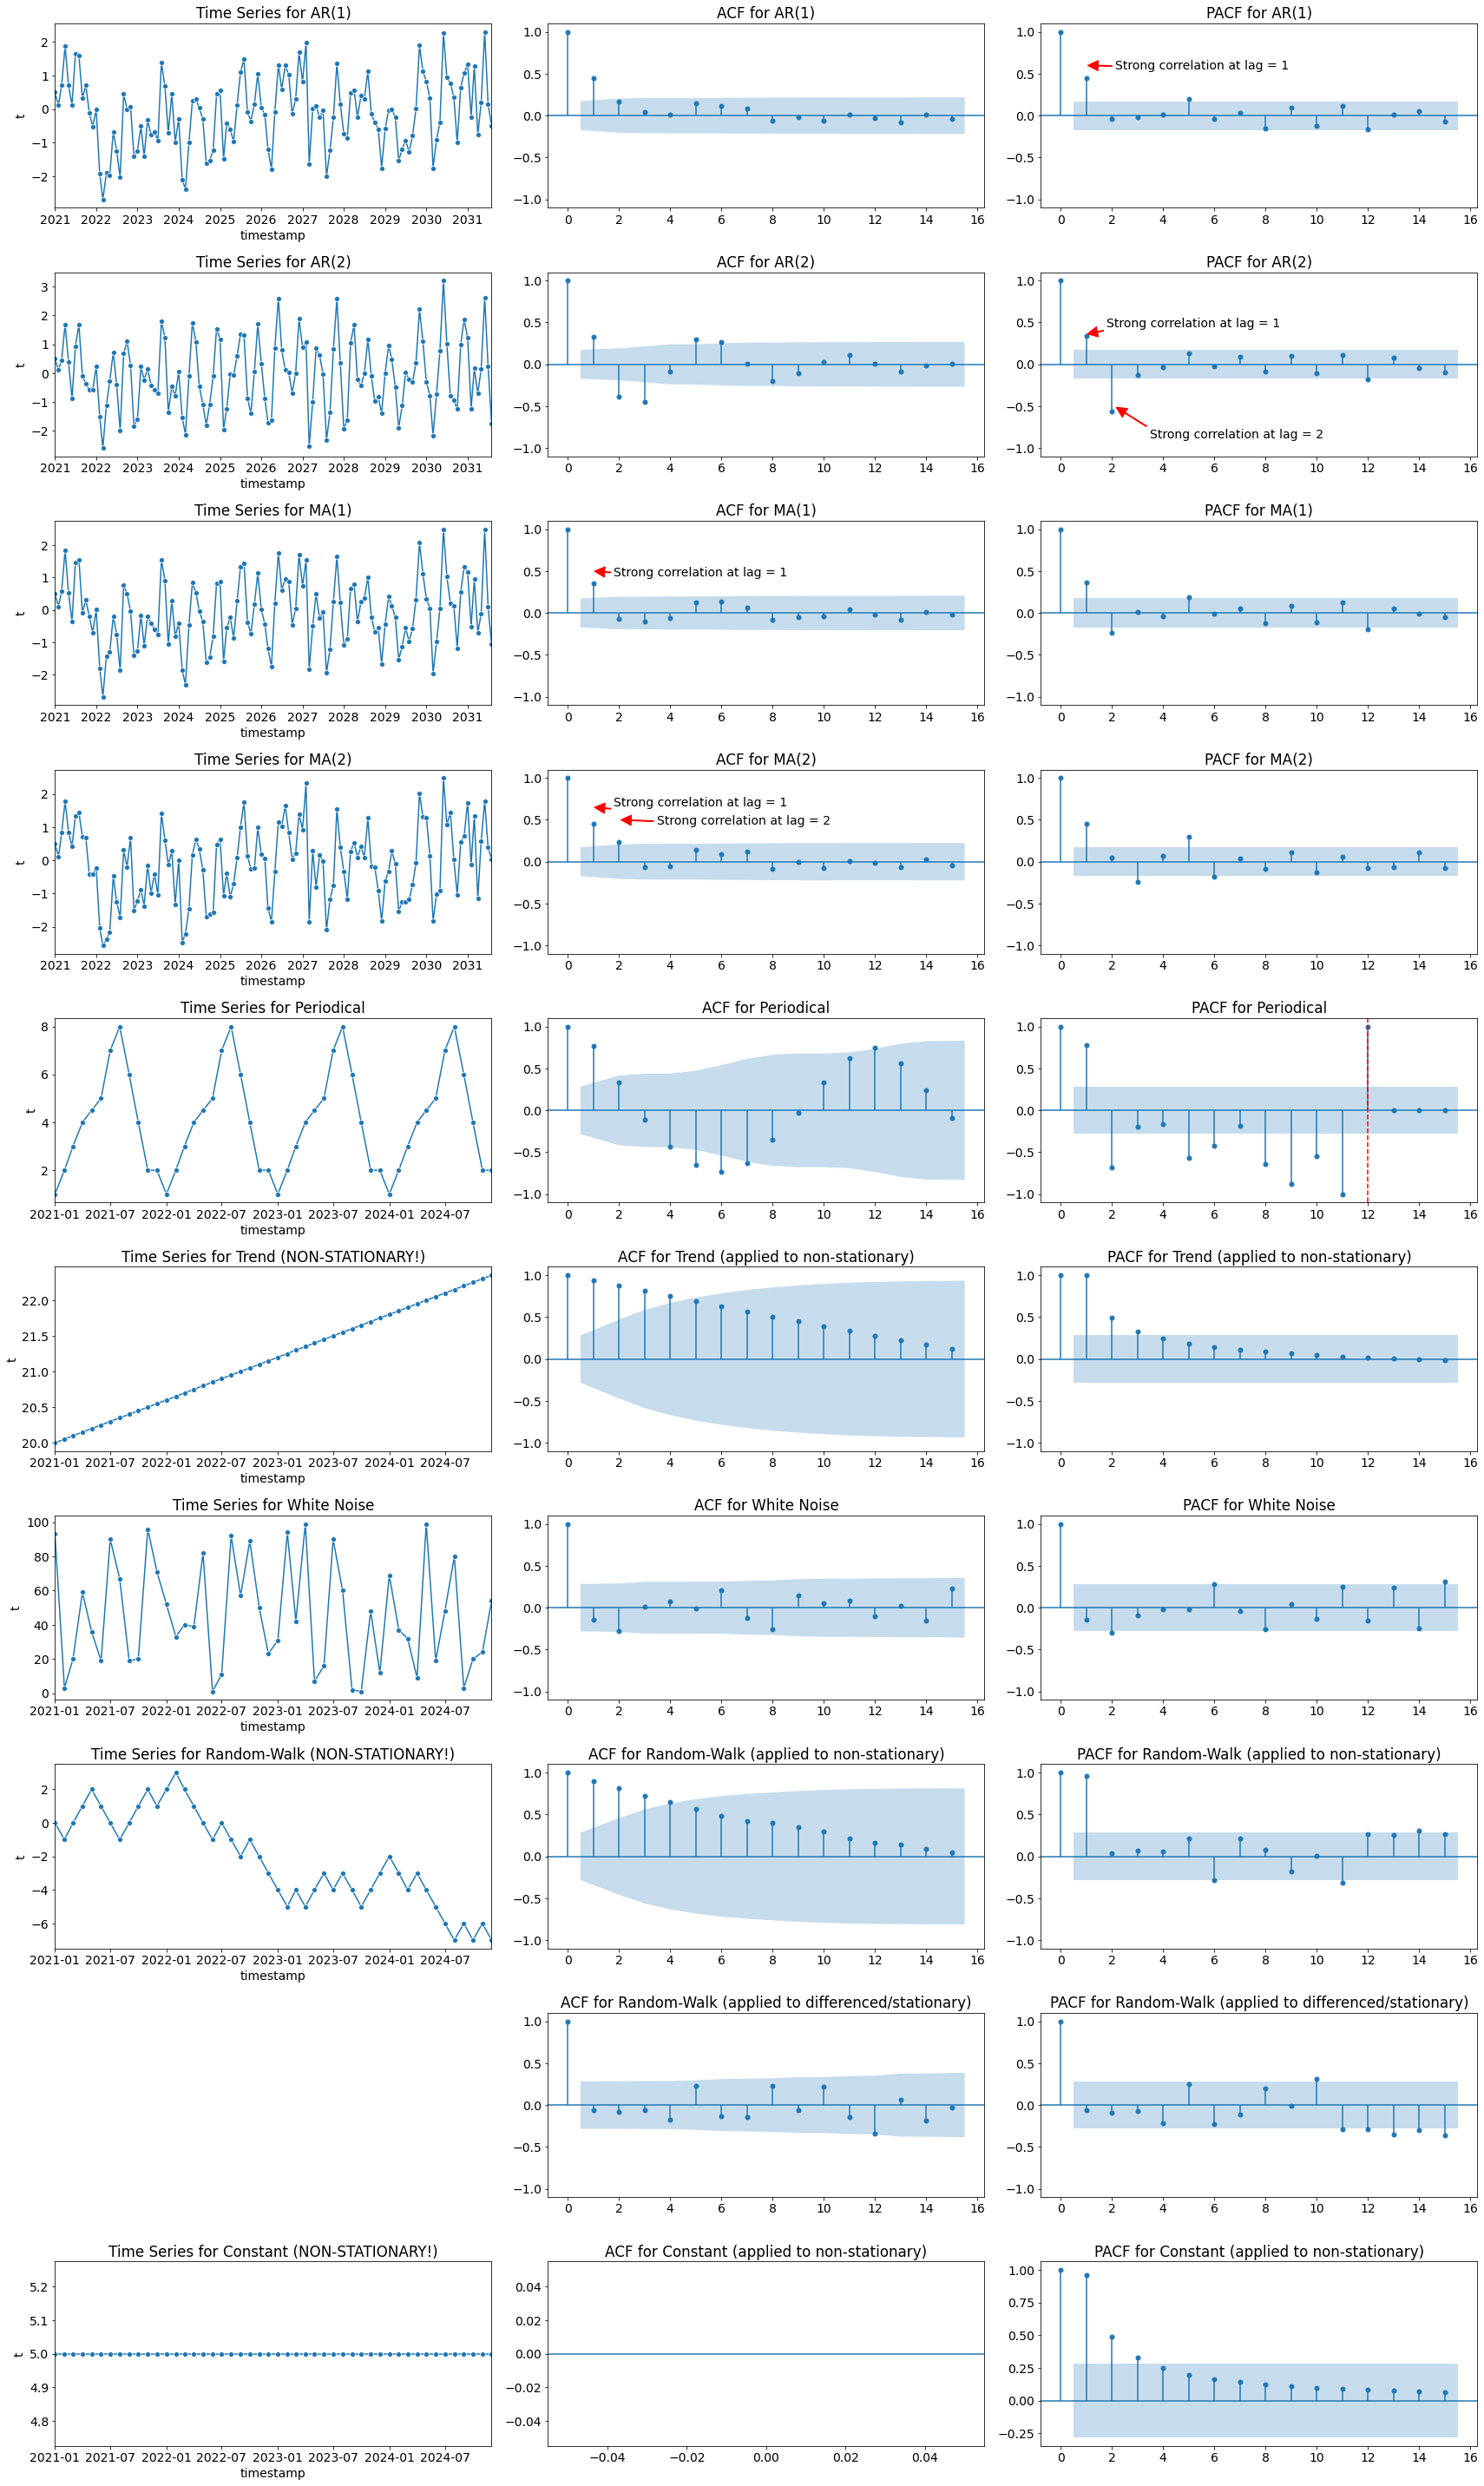

Código de solución estudiante 1

In [ ]:
# Código de solución estudiante 1
.
.
.
.


Código de solución estudiante 2

In [ ]:
# Código de solución estudiante 2
.
.
.
.


### Respuesta planteada en el ejercicio usando (markdown)
 La respuesta es .........